In [ ]:
import pandas as pd
data=pd.read_csv("Mall_Customers.csv")
data



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Hierarchical** **Clustering**

In [ ]:
data=data.drop("CustomerID", axis=1)
data["Gender"]=data["Gender"].map({"Male":1, "Female":0})  #convert Gender values into numerical
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
                                                                             #5 gpes

In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative
# kassamhom l 5 pges de 0 a 4

,0
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


In [ ]:

agglomerative=agglomerative.rename({0:"clust_labels"},axis=1)

In [ ]:
agglomerative

,clust_labels
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


In [ ]:
cluster=agglomerative["clust_labels"]
data=data.join(cluster)    #pour ajouter cette colonne a l'anciene data frame


In [ ]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),clust_labels
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,0


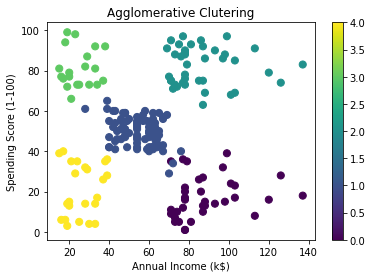

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] , c= agglomerative["clust_labels"], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

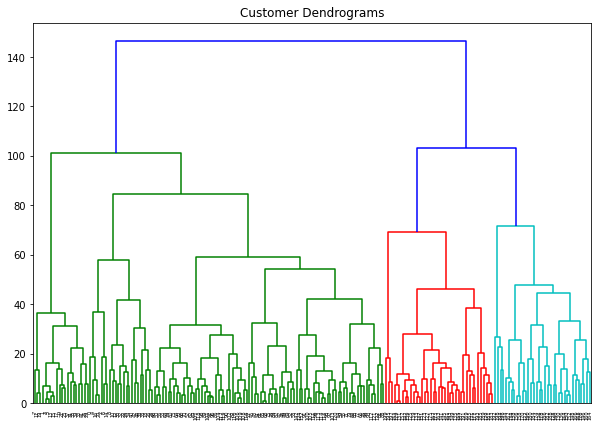

In [ ]:

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))    #yaatini fekra kadech nam noussel naaml men gpe

In [ ]:
data=data.drop("clust_labels",axis=1)

**Partitional** **Clustering**

In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,4
2,0
3,4
4,0
...,...
195,1
196,3
197,1
198,3


In [ ]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.


[[ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]]


In [ ]:

labels=labels.rename({0:"label"},axis=1)
cluster=labels["label"]
data=data.join(cluster)    #pour ajouter cette colonne a l'anciene data frame

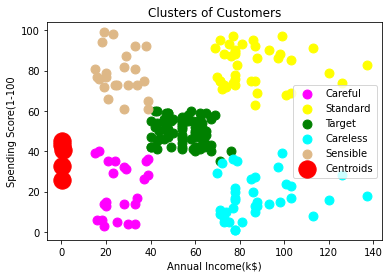

In [ ]:
plt.scatter(data["Annual Income (k$)"][data.label == 0],          
            data["Spending Score (1-100)"][data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["Annual Income (k$)"][data.label == 1],
           data["Spending Score (1-100)"][data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["Annual Income (k$)"][data.label == 2],
           data["Spending Score (1-100)"][data.label == 2],s=80,c='green',label='Target')
plt.scatter(data["Annual Income (k$)"][data.label == 3], 
           data["Spending Score (1-100)"][data.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["Annual Income (k$)"][data.label == 4], 
           data["Spending Score (1-100)"][data.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans  
sum_of_squared_distances=[]
K=range(1,15)
for i in K:
  km=KMeans(n_clusters=i)
  km=km.fit(data)                  #fit to train the model
  sum_of_squared_distances.append(km.inertia_)  #aooend i3abi kol madoul boucle i3abi liste

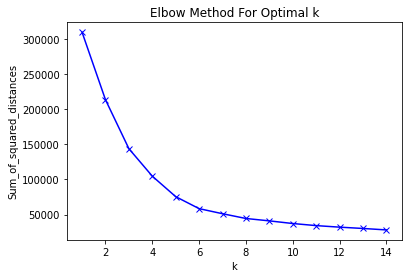

In [ ]:
#Elbow method to minimize WSS (within-cluster Sum of Square)
import matplotlib.pyplot as plt 
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)###plotting Elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()